In [2]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('/Users/adwaita/Desktop/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [20]:
df.dropna(how='any',inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le_pclass = LabelEncoder()
le_age = LabelEncoder()
le_sex = LabelEncoder()
le_fare = LabelEncoder()

In [22]:
inputs=df.drop('Survived',axis='columns')
y=df['Survived']

In [23]:
inputs['Pclass_n']=le_pclass.fit_transform(inputs['Pclass'])
inputs['Age_n']=le_pclass.fit_transform(inputs['Age'])
inputs['Sex_n']=le_pclass.fit_transform(inputs['Sex'])
inputs['Fare_n']=le_pclass.fit_transform(inputs['Fare'])
inputs

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_n,Age_n,Sex_n,Fare_n
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,32,0,57
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,28,0,44
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,49,1,41
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,4,0,10
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,53,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,42,0,43
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0,26,1,1
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0,51,0,68
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,12,0,23


In [46]:
X=inputs.drop(['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis='columns')

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)


In [63]:
X.dtypes

Pclass_n    int64
Age_n       int64
Sex_n       int64
Fare_n      int64
dtype: object

In [48]:
x_train.shape,x_test.shape

((128, 4), (55, 4))

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [50]:
%%time
classifier_rf.fit(x_train,y_train)

CPU times: user 260 ms, sys: 62.7 ms, total: 323 ms
Wall time: 277 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [51]:
classifier_rf.oob_score_

0.765625

In [52]:
classifier_rf.score(x_test,y_test)

0.6909090909090909

In [53]:
#Grid Search for Parameter Finetuning
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
params = {
'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200], 'n_estimators': [10,25,30,50,100,200]
}

In [54]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [55]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 1.73 s, sys: 284 ms, total: 2.01 s
Wall time: 59.2 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [56]:
grid_search.best_score_

0.8125

In [57]:
rf_best = grid_search.best_estimator_ 
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [62]:
X.columns

Index(['Pclass_n', 'Age_n', 'Sex_n', 'Fare_n'], dtype='object')

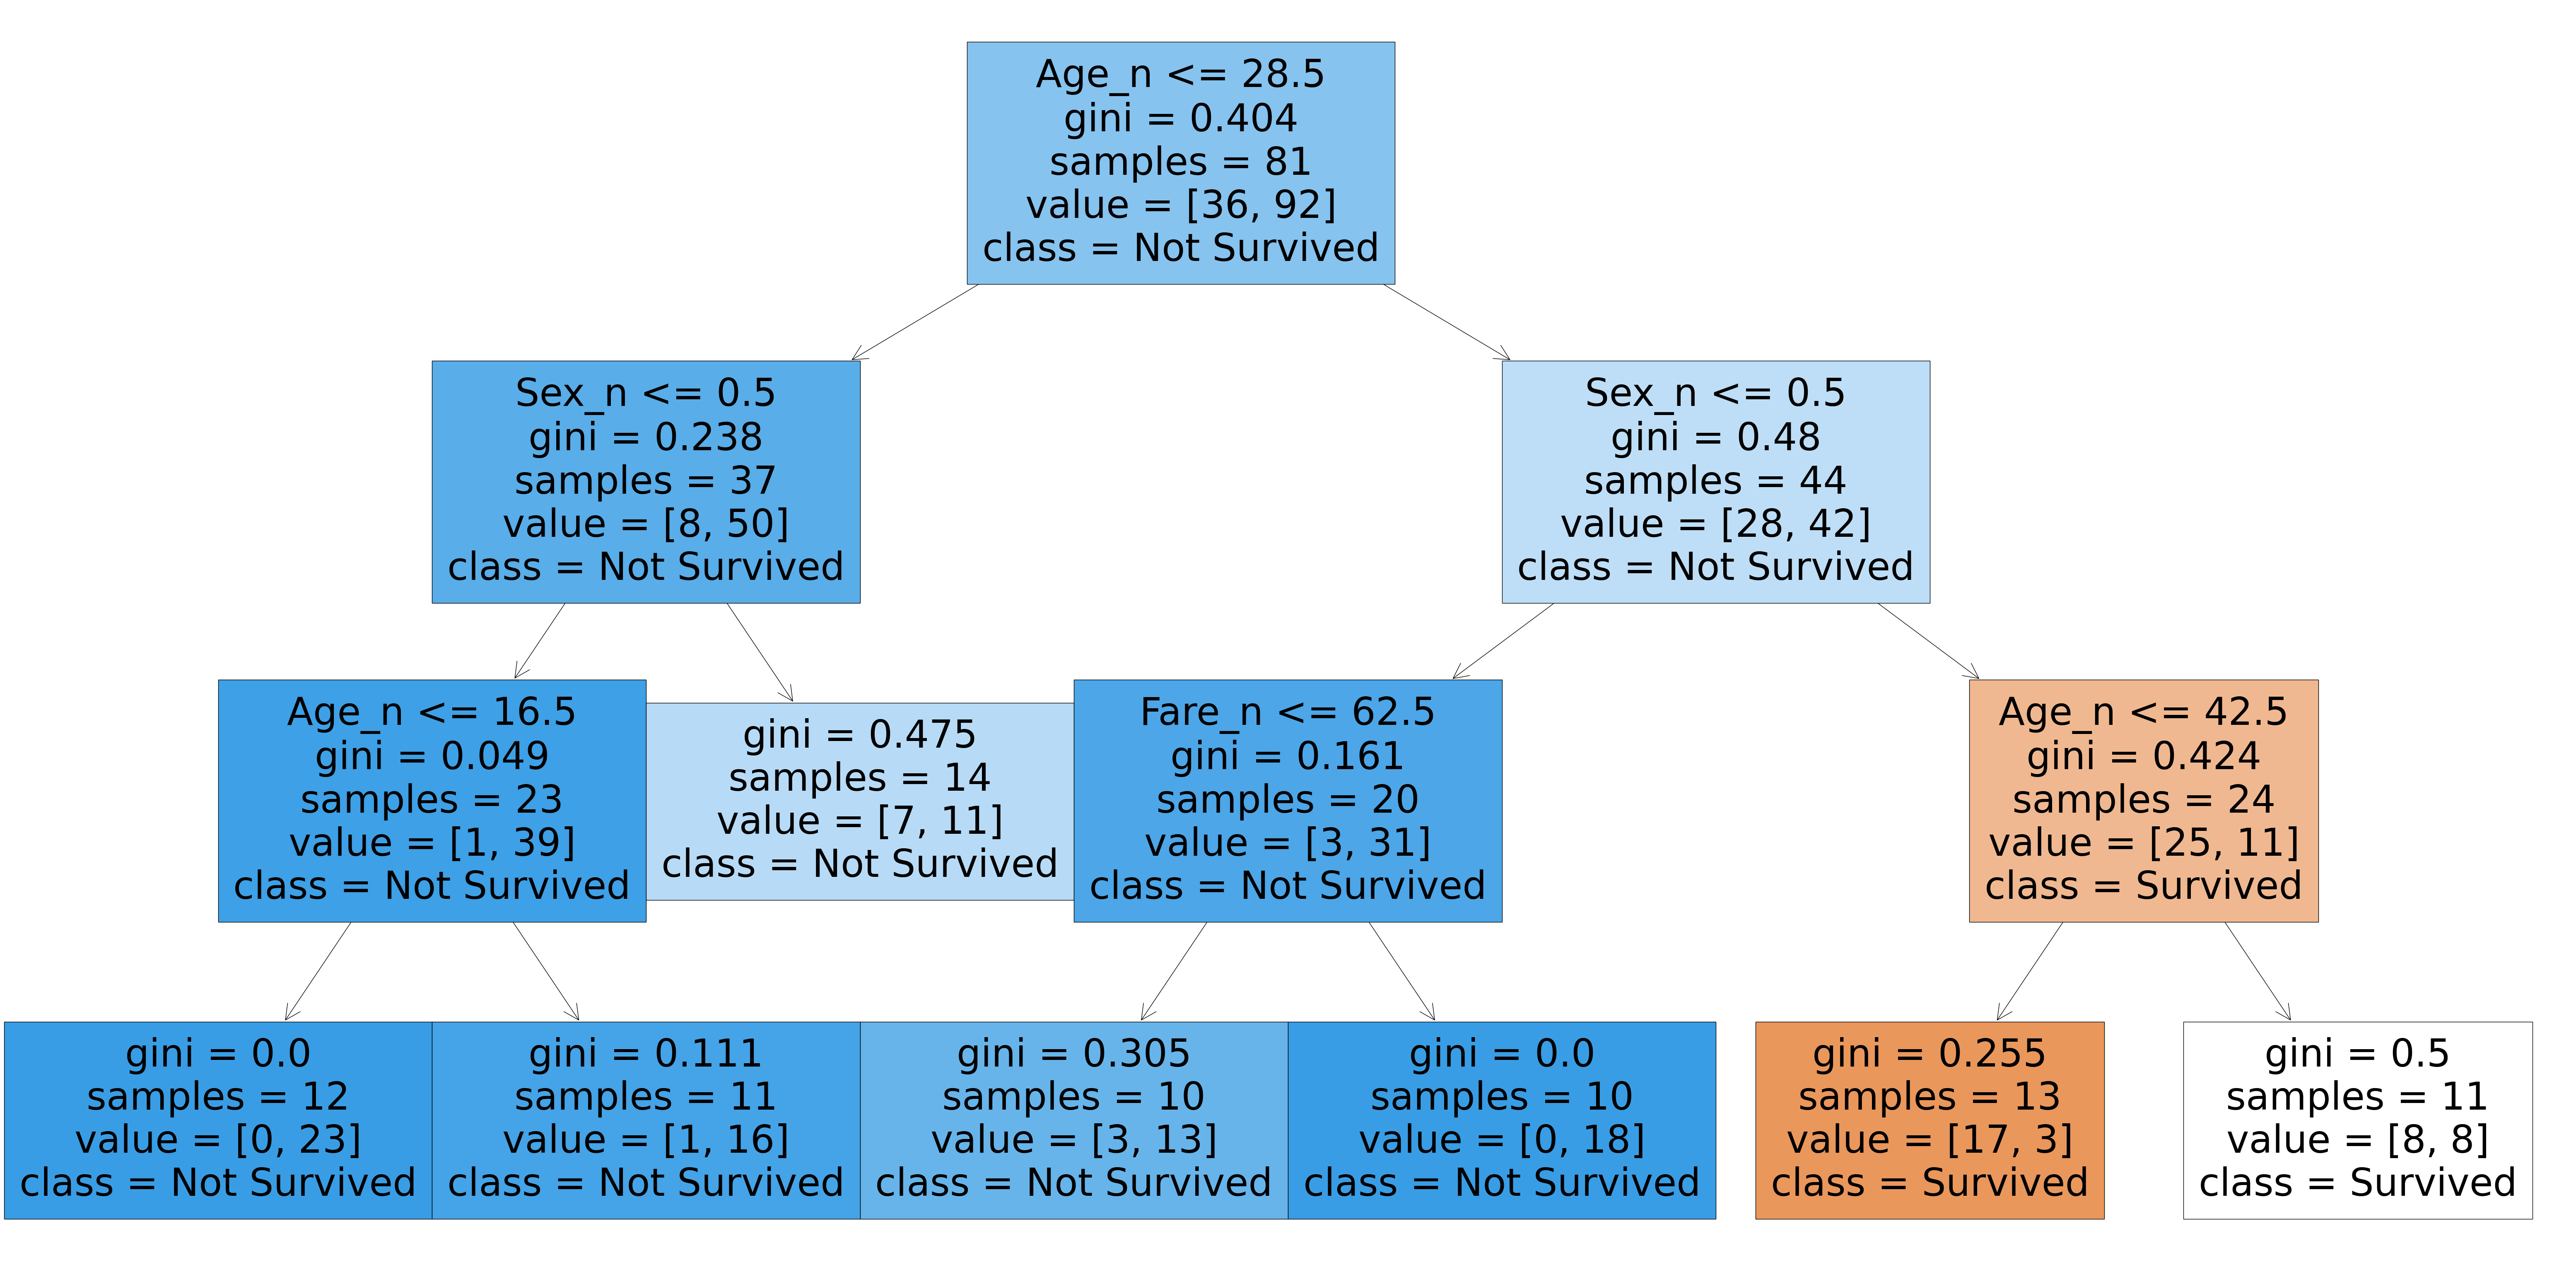

In [64]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[6], feature_names = X.columns.tolist(),class_names=['Survived', "Not Survived"],filled=True)
plt.show()

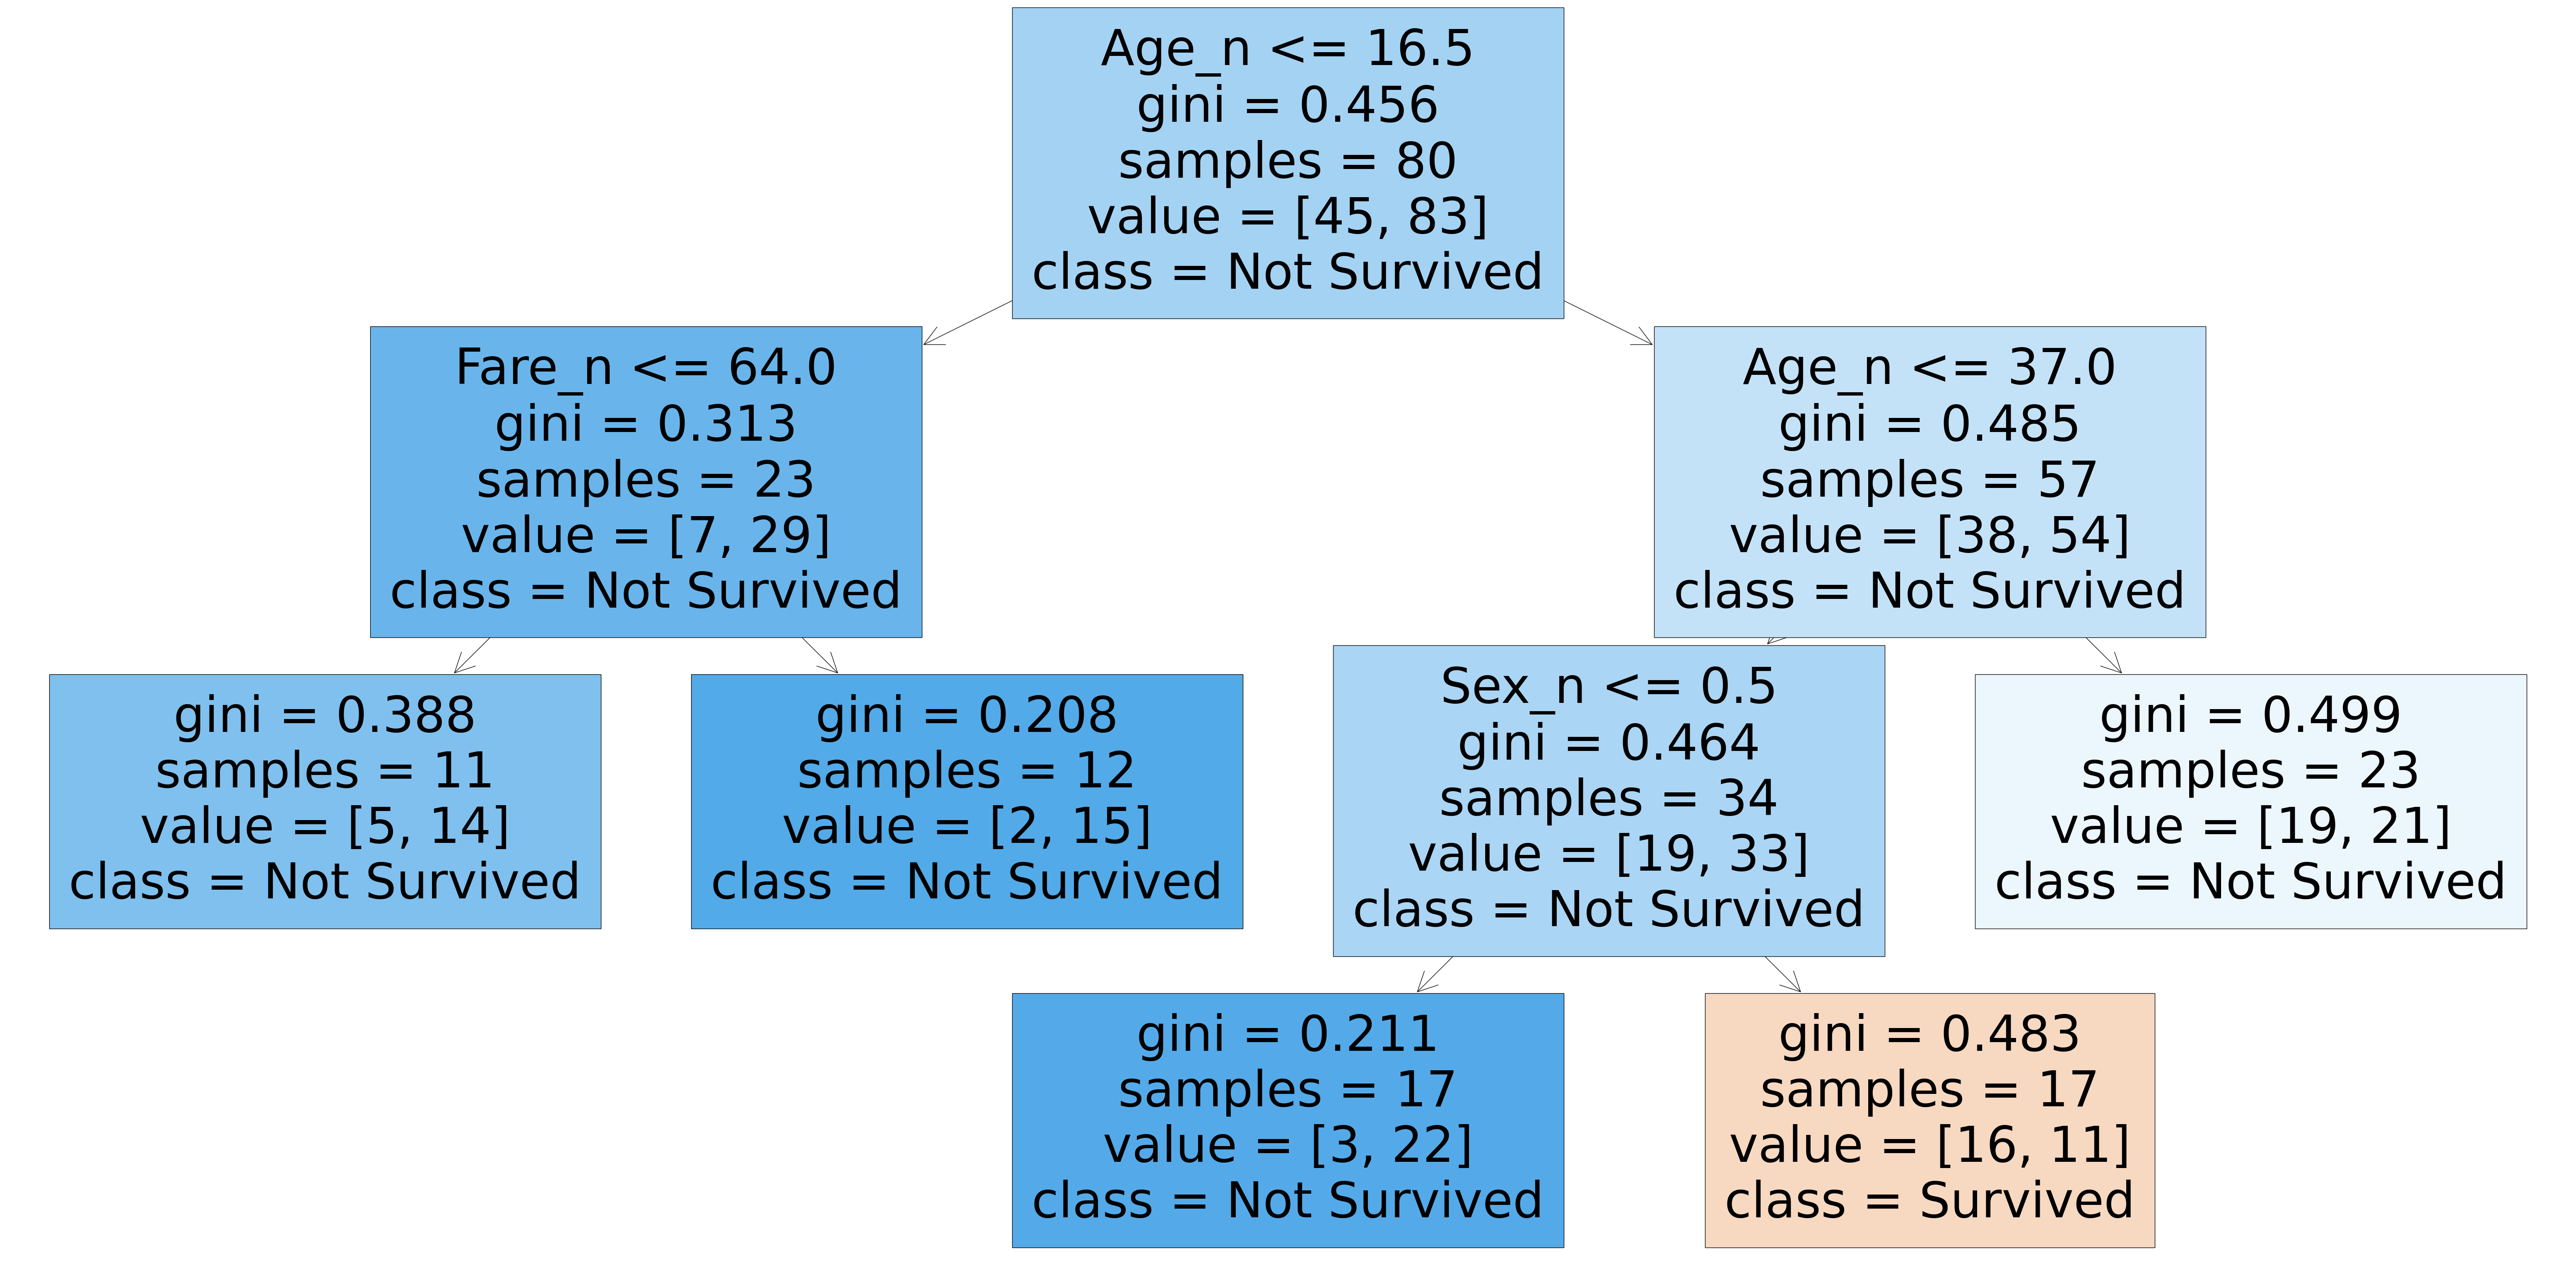

In [75]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns.tolist(),class_names=['Survived', "Not Survived"],filled=True);

In [66]:
rf_best.feature_importances_

array([0.00565558, 0.21523629, 0.61634861, 0.16275952])

In [68]:
imp_df = pd.DataFrame({
"Varname": x_train.columns,
"Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
2,Sex_n,0.616349
1,Age_n,0.215236
3,Fare_n,0.162760
0,Pclass_n,0.005656


In [69]:

from scipy.stats import randint
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None], 'n_estimators':np.arange(10, 500, step=50),'max_features':randint(1,7), 'criterion':['gini','entropy'], 'min_samples_leaf':randint(1,4), 'min_samples_split':np.arange(2, 10, step=2)}


In [70]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=4)


In [72]:
%%time
model_random = rf_random.fit(x_train, y_train)


CPU times: user 665 ms, sys: 156 ms, total: 822 ms
Wall time: 57.9 s


In [73]:
model_random.best_params_
{'criterion': 'entropy', 'max_depth': 30, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 460}
model_random.best_score_

0.765625

In [74]:
rf_best1 = model_random.best_estimator_ 
rf_best1

RandomForestClassifier(max_depth=60, max_features=1, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=60, n_jobs=-1,
                       random_state=42)

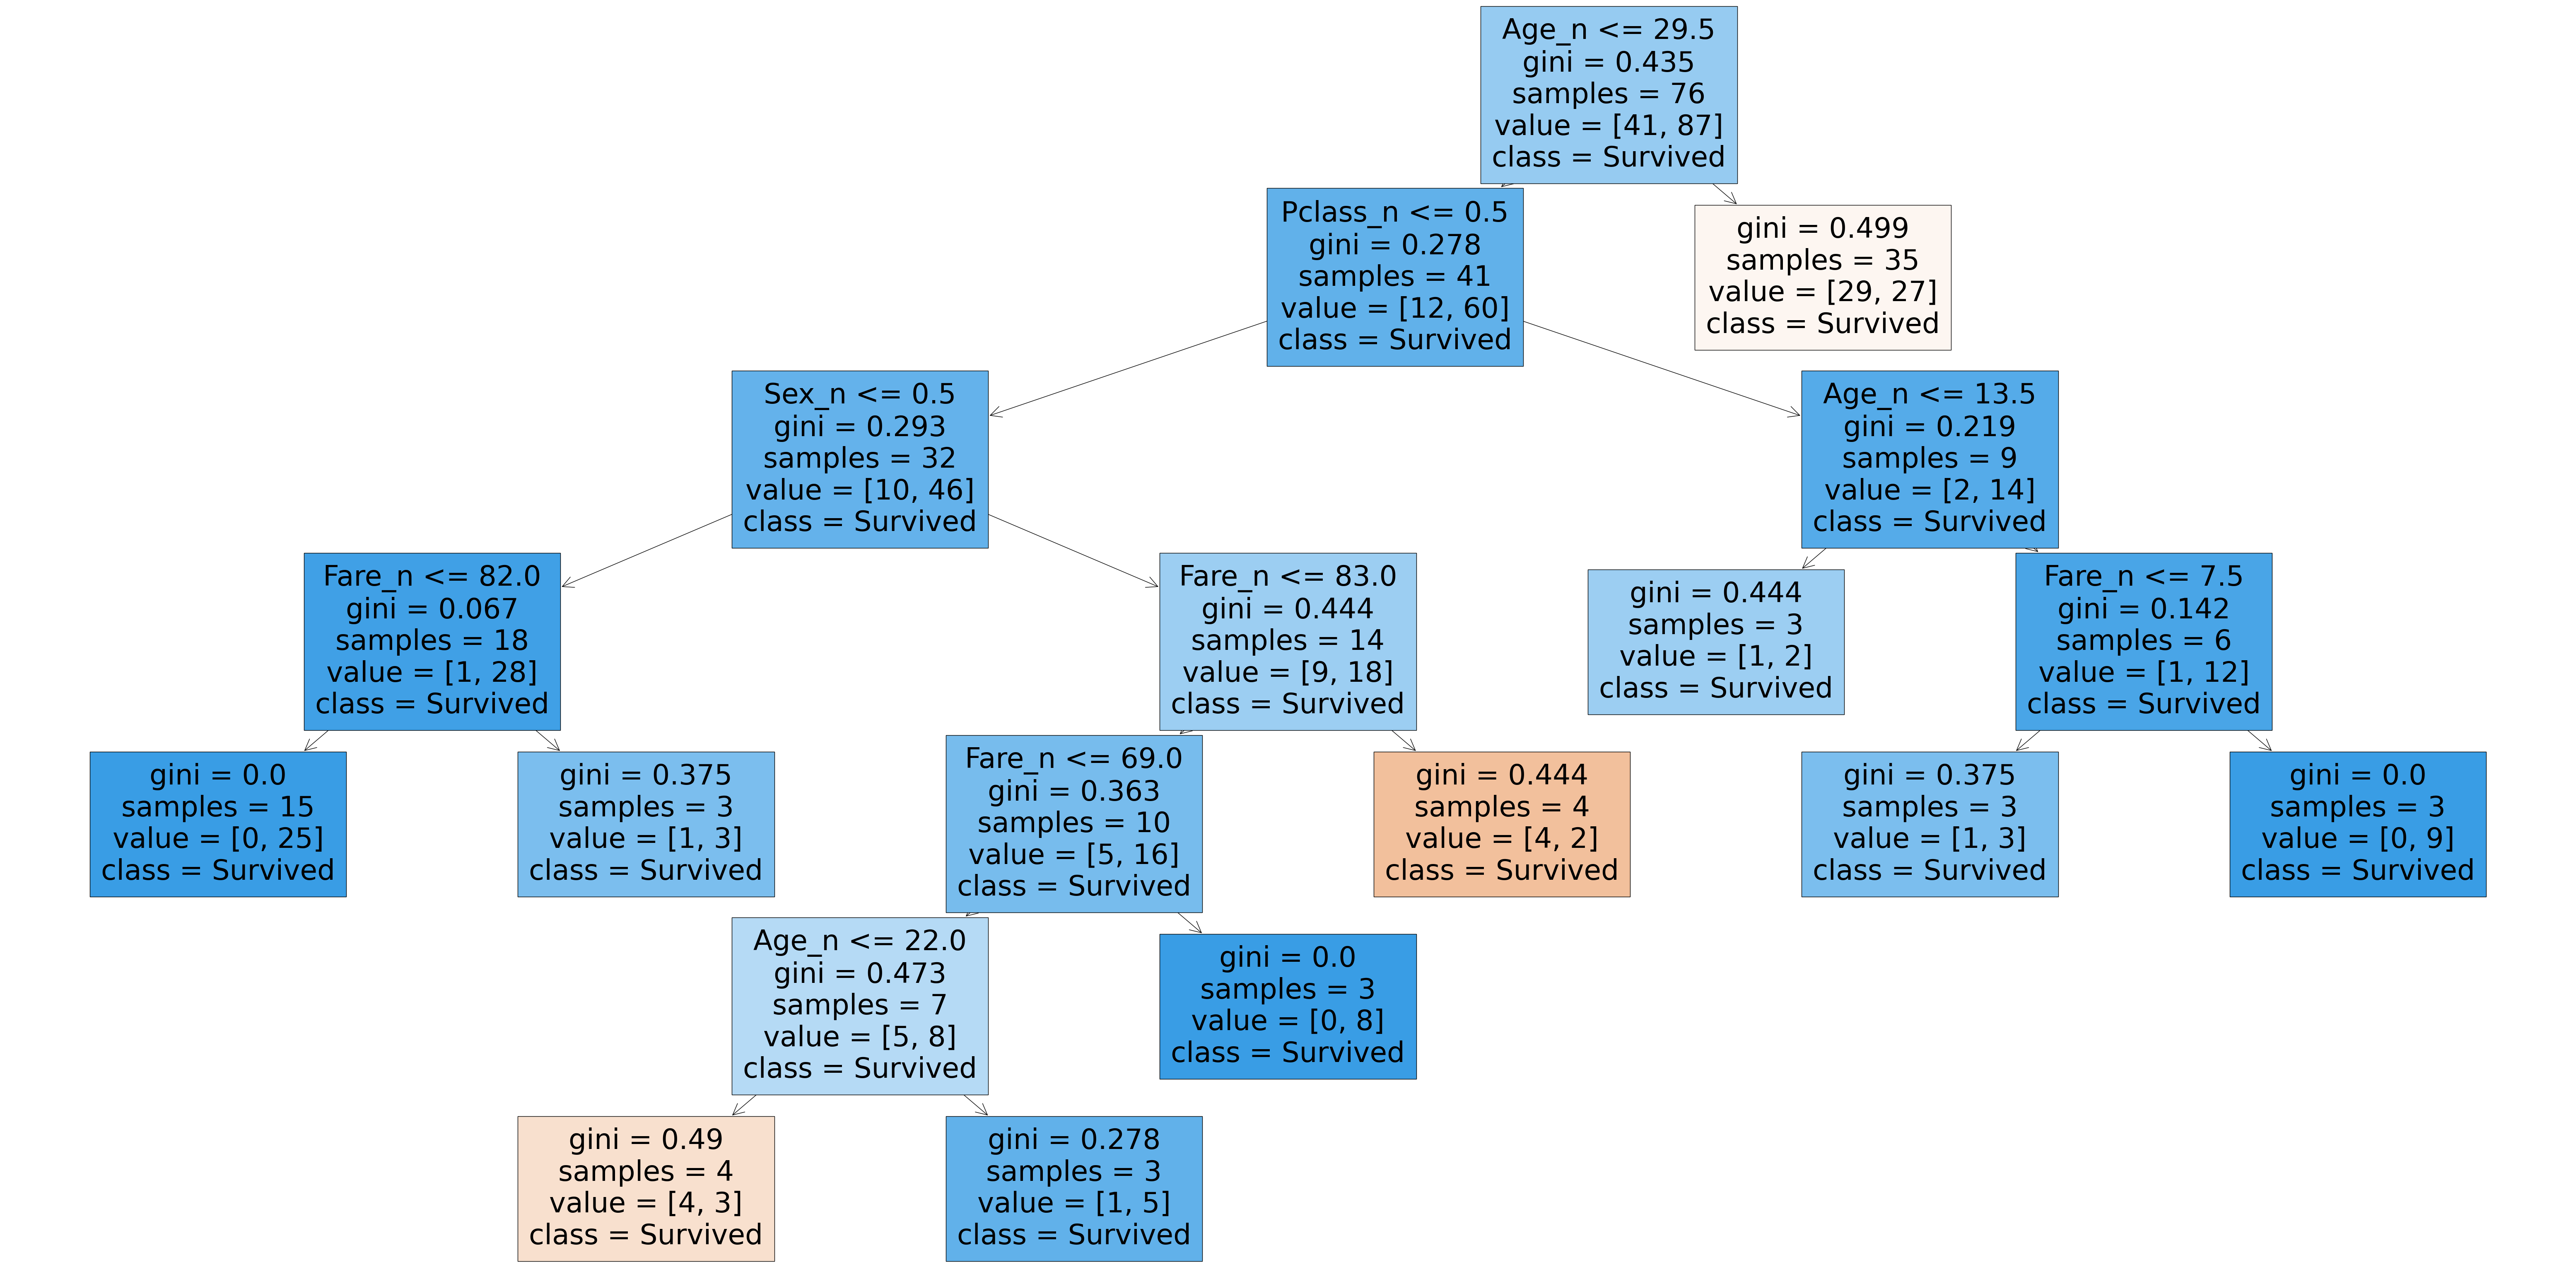

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best1.estimators_[9], feature_names = X.columns.tolist(),class_names=['Survived', "Survived"],filled=True);

In [80]:
# Model (Model Picked through GridSearch) Validation 
from sklearn.metrics import confusion_matrix
y_pred = rf_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  7],
       [ 8, 27]])

Text(95.72222222222221, 0.5, 'Truth')

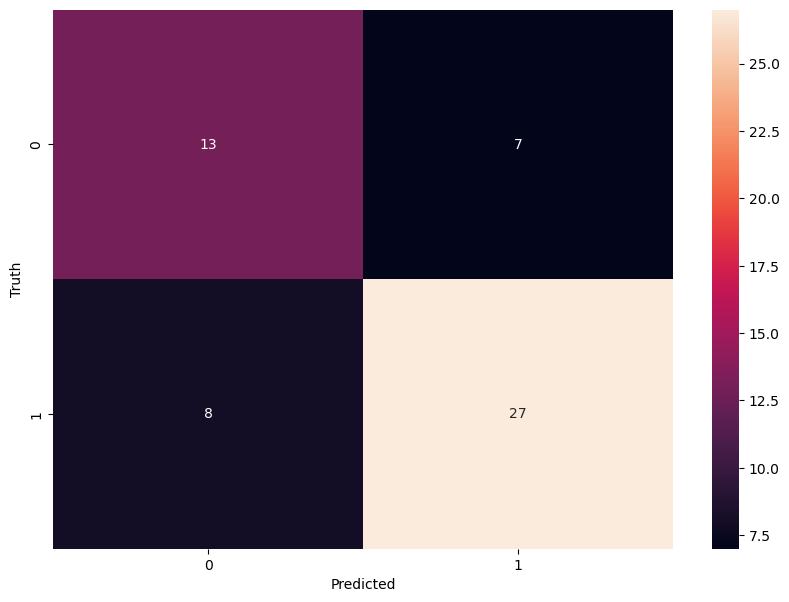

In [81]:
plt.figure(figsize=(10,7)) 
sns.heatmap(cm, annot=True) 
plt.xlabel('Predicted') 
plt.ylabel('Truth')

In [83]:
from sklearn.metrics import confusion_matrix
y_pred1 = rf_best1.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[13,  7],
       [ 8, 27]])

Text(95.72222222222221, 0.5, 'Truth')

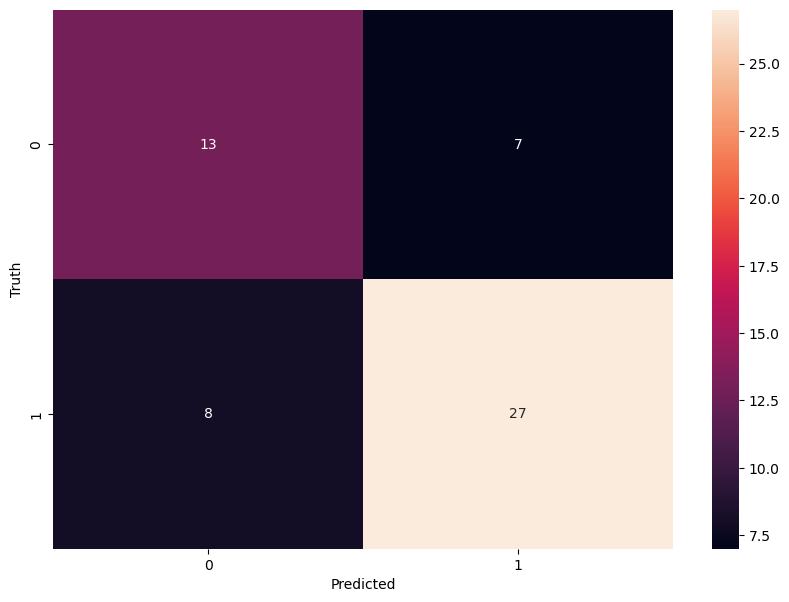

In [84]:
plt.figure(figsize=(10,7)) 
sns.heatmap(cm1, annot=True) 
plt.xlabel('Predicted') 
plt.ylabel('Truth')

In [85]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        20
           1       0.79      0.77      0.78        35

    accuracy                           0.73        55
   macro avg       0.71      0.71      0.71        55
weighted avg       0.73      0.73      0.73        55



In [86]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        20
           1       0.79      0.74      0.76        35

    accuracy                           0.71        55
   macro avg       0.69      0.70      0.69        55
weighted avg       0.72      0.71      0.71        55



In [88]:
y_pred2 = classifier_rf.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2) 
cm2

array([[14,  6],
       [11, 24]])

Text(95.72222222222221, 0.5, 'Truth')

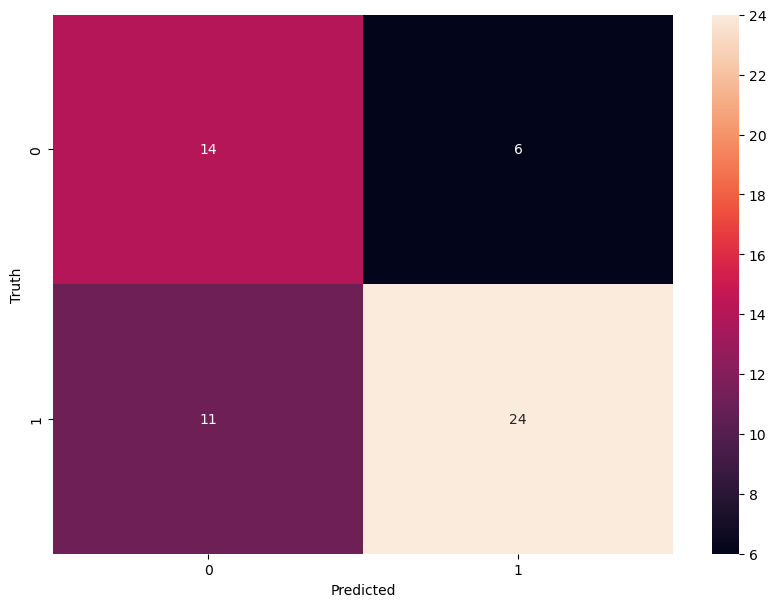

In [89]:
plt.figure(figsize=(10,7)) 
sns.heatmap(cm2, annot=True) 
plt.xlabel('Predicted') 
plt.ylabel('Truth')